<a href="https://colab.research.google.com/github/KsenyaSeva/Clustering-COVID19/blob/main/%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_COVID_19_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch # для построения дендрограммы
from sklearn.cluster import AgglomerativeClustering # собственно для кластеризации
from sklearn.decomposition import PCA
import tslearn
from tslearn.clustering import TimeSeriesKMeans

In [ ]:
!pip install tslearn==0.5.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.8/875.8 KB 13.5 MB/s eta 0:00:00


Работа от 26.02.23


#> Данные за месяц





In [ ]:
df_c = pd.read_csv('/content/time_series_covid19_confirmed_global.csv')
confirmed = df_c[df_c.columns[1:36]]
confirmed.head(200)

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20
0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Albania,41.15330,20.168300,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Nepal,28.16670,84.250000,0,0,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
196,Netherlands,12.52110,-69.968300,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197,Netherlands,12.17840,-68.238500,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198,Netherlands,12.16960,-68.990000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_d = pd.read_csv('/content/time_series_covid19_deaths_global.csv')
death = df_d[df_d.columns[1:36]]
death.head(223)

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20
0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Albania,41.15330,20.168300,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,Portugal,39.39990,-8.224500,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
219,Qatar,25.35480,51.183900,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
220,Romania,45.94320,24.966800,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
221,Russia,61.52401,105.318756,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
confirmed.drop(['Lat','Long','Country/Region'],axis=1,inplace=True)
confirmed.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
death.drop(['Lat','Long','Country/Region'],axis=1,inplace=True)
death.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_Month_c19 = pd.DataFrame()
df_Month_c19['Country/Region'] = df_c['Country/Region']
df_Month_c19['confirmed_month'] = (confirmed.sum(axis=1))
df_Month_c19['death_month'] = (death.sum(axis=1))
df_Month_c19.head(223)

,Country/Region,confirmed_month,death_month
0,Afghanistan,0,0
1,Albania,0,0
2,Algeria,0,0
3,Andorra,0,0
4,Angola,0,0
...,...,...,...
218,Portugal,0,0
219,Qatar,0,0
220,Romania,0,0
221,Russia,90,0


In [ ]:
#Month_c19 = confirmed[4:36]

In [ ]:
df_Month_c19.dropna()

,Country/Region,confirmed_month,death_month
0,Afghanistan,0,0
1,Albania,0,0
2,Algeria,0,0
3,Andorra,0,0
4,Angola,0,0
...,...,...,...
284,West Bank and Gaza,0,0
285,Winter Olympics 2022,0,0
286,Yemen,0,0
287,Zambia,0,0


In [ ]:
Month_c19_2 = df_Month_c19[['confirmed_month','death_month']]

In [ ]:
sc = StandardScaler()
S_Month_c19 = sc.fit_transform(Month_c19_2)
S_Month_c19 = pd.DataFrame(S_Month_c19)
S_Month_c19.head(200)

,0,1
0,-0.075959,-0.061603
1,-0.075959,-0.061603
2,-0.075959,-0.061603
3,-0.075959,-0.061603
4,-0.075959,-0.061603
...,...,...
195,-0.075389,-0.061603
196,-0.075959,-0.061603
197,-0.075959,-0.061603
198,-0.075959,-0.061603


In [ ]:
Z = S_Month_c19

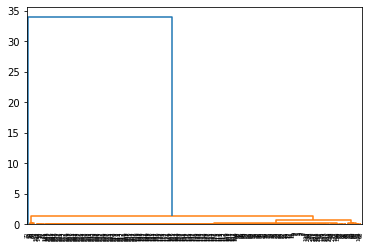

In [ ]:
dendro = sch.dendrogram(sch.linkage(Z,'ward'))

Итог:

По дендрограме образовалось 2 кластера, возьму их






In [ ]:
# беру 2кластера, из дендрограмы
kmeans = KMeans(n_clusters=2)
kmeans.fit(S_Month_c19)
df_Month_c19['Cluster'] = kmeans.labels_
MonThCl = df_Month_c19[df_Month_c19['Cluster'] == 0]
MonThCl

,Country/Region,confirmed_month,death_month,Cluster
0,Afghanistan,0,0,0
1,Albania,0,0,0
2,Algeria,0,0,0
3,Andorra,0,0,0
4,Angola,0,0,0
...,...,...,...,...
284,West Bank and Gaza,0,0,0
285,Winter Olympics 2022,0,0,0
286,Yemen,0,0,0
287,Zambia,0,0,0


In [ ]:
MonThCl2 = df_Month_c19[df_Month_c19['Cluster'] == 1]
MonThCl2

,Country/Region,confirmed_month,death_month,Cluster
72,China,1701232,27393,1


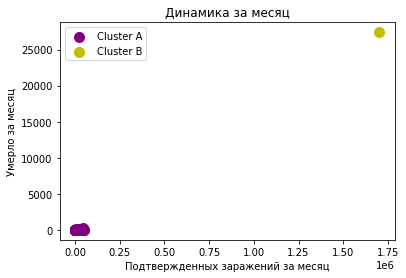

In [ ]:
plt.scatter(MonThCl['confirmed_month'], MonThCl['death_month'], s=100, c='purple', label='Cluster A')
plt.scatter(MonThCl2['confirmed_month'], MonThCl2['death_month'], s=100, c='y', label='Cluster B')
plt.xlabel('Подтвержденных заражений за месяц')
plt.ylabel('Умерло за месяц')
plt.title('Динамика за месяц')
plt.legend()
plt.show()

**Итог:**

По графику видно, что заразившихся больше всего с января по февраль 2020 в Китае, более 1 млн. человек, для него выделен отдельный кластер. По смертности Китай тоже на первом месте, более 25 тыс.человек. Остальные страны в том числе и Россия во втором кластере, т.к это было начало пандемии для России и европейский стран, тогда как в Китае пандемия уже распространилась 

# > Данные за год 



In [ ]:
df_с_year = pd.read_csv('/content/time_series_covid19_confirmed_global.csv')
confirmed_year = df_с_year[df_с_year.columns[1:369]]
confirmed_year.head(200)

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21
0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,...,53538,53584,53690,53775,53831,53938,53984,54062,54141,54278
1,Albania,41.15330,20.168300,0,0,0,0,0,0,0,...,63971,64627,65334,65994,66635,67216,67690,67982,68568,69238
2,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,...,102369,102641,102860,103127,103381,103611,103833,104092,104341,104606
3,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,...,8586,8682,8818,8868,8946,9038,9083,9083,9194,9308
4,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,...,18254,18343,18425,18613,18679,18765,18875,18926,19011,19093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Nepal,28.16670,84.250000,0,0,0,1,1,1,1,...,265268,265698,266143,266546,266816,267056,267322,267644,267992,268310
196,Netherlands,12.52110,-69.968300,0,0,0,0,0,0,0,...,6068,6154,6228,6296,6350,6405,6435,6451,6523,6562
197,Netherlands,12.17840,-68.238500,0,0,0,0,0,0,0,...,196,196,196,196,196,196,196,196,196,196
198,Netherlands,12.16960,-68.990000,0,0,0,0,0,0,0,...,4464,4469,4488,4498,4505,4514,4514,4523,4527,4535


In [ ]:
df_d_year = pd.read_csv('/content/time_series_covid19_deaths_global.csv')
death_year = df_d_year[df_d_year.columns[1:369]]
death_year.head(223)

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21
0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,...,2288,2301,2308,2314,2324,2336,2339,2343,2346,2354
1,Albania,41.15330,20.168300,0,0,0,0,0,0,0,...,1247,1252,1256,1261,1265,1270,1277,1281,1287,1291
2,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,...,2812,2816,2819,2822,2827,2831,2836,2840,2843,2849
3,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,...,85,86,87,88,88,91,91,91,92,92
4,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,...,420,422,424,425,428,431,436,439,442,444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,Portugal,39.39990,-8.224500,0,0,0,0,0,0,0,...,7925,8080,8236,8384,8543,8709,8861,9028,9246,9465
219,Qatar,25.35480,51.183900,0,0,0,0,0,0,0,...,246,246,246,246,246,246,246,248,248,248
220,Romania,45.94320,24.966800,0,0,0,0,0,0,0,...,16725,16881,16969,17035,17098,17164,17221,17271,17369,17485
221,Russia,61.52401,105.318756,0,0,0,0,0,0,0,...,61389,61908,62463,63016,63558,64134,64601,65059,65632,66214


In [ ]:
confirmed_year.drop(['Lat','Long','Country/Region'],axis=1,inplace=True)
confirmed_year.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21
0,0,0,0,0,0,0,0,0,0,0,...,53538,53584,53690,53775,53831,53938,53984,54062,54141,54278
1,0,0,0,0,0,0,0,0,0,0,...,63971,64627,65334,65994,66635,67216,67690,67982,68568,69238
2,0,0,0,0,0,0,0,0,0,0,...,102369,102641,102860,103127,103381,103611,103833,104092,104341,104606
3,0,0,0,0,0,0,0,0,0,0,...,8586,8682,8818,8868,8946,9038,9083,9083,9194,9308
4,0,0,0,0,0,0,0,0,0,0,...,18254,18343,18425,18613,18679,18765,18875,18926,19011,19093


In [ ]:
death_year.drop(['Lat','Long','Country/Region'],axis=1,inplace=True)
death_year.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21
0,0,0,0,0,0,0,0,0,0,0,...,2288,2301,2308,2314,2324,2336,2339,2343,2346,2354
1,0,0,0,0,0,0,0,0,0,0,...,1247,1252,1256,1261,1265,1270,1277,1281,1287,1291
2,0,0,0,0,0,0,0,0,0,0,...,2812,2816,2819,2822,2827,2831,2836,2840,2843,2849
3,0,0,0,0,0,0,0,0,0,0,...,85,86,87,88,88,91,91,91,92,92
4,0,0,0,0,0,0,0,0,0,0,...,420,422,424,425,428,431,436,439,442,444


In [ ]:
df_Year_c19 = pd.DataFrame()
df_Year_c19['Country/Region'] = df_с_year['Country/Region']
df_Year_c19['confirmed_year'] = (confirmed_year.sum(axis=1))
df_Year_c19['death_year'] = (death_year.sum(axis=1))
df_Year_c19.head(223)

<ipython-input-124-bc4b32d451f6>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_Year_c19['confirmed_year'] = (confirmed_year.sum(axis=1))


,Country/Region,confirmed_year,death_year
0,Afghanistan,9.570935e+06,342095
1,Albania,5.003230e+06,113179
2,Algeria,1.262846e+07,433949
3,Andorra,8.558610e+05,17225
4,Angola,1.708912e+06,45240
...,...,...,...
218,Portugal,3.833248e+07,775393
219,Qatar,2.943603e+07,46231
220,Romania,5.523195e+07,1581946
221,Russia,3.616633e+08,6179623


In [ ]:
Year_c19_2 = df_Year_c19[['confirmed_year','death_year']]

In [ ]:
sc = StandardScaler()
S_Year_c19 = sc.fit_transform(Year_c19_2)
S_Year_c19 = pd.DataFrame(S_Year_c19)
S_Year_c19.head(200)

,0,1
0,-0.140018,-0.140717
1,-0.167632,-0.192653
2,-0.121533,-0.119877
3,-0.192705,-0.214423
4,-0.187548,-0.208067
...,...,...
195,-0.037429,-0.180355
196,-0.193691,-0.217005
197,-0.197753,-0.218257
198,-0.196205,-0.218107


In [ ]:
Z = S_Year_c19

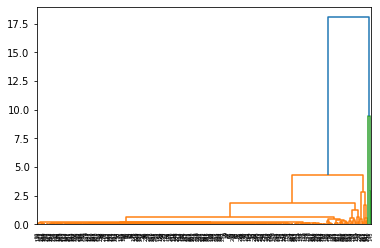

In [ ]:
dendro2 = sch.dendrogram(sch.linkage(Z,'complete'))

Итог:

По дендрограме образовалось 10 кластера, возьму их






In [ ]:
# беру 10 кластера, из дендрограмы
kmeans = KMeans(n_clusters=10)
kmeans.fit(S_Year_c19)
df_Year_c19['Cluster'] = kmeans.labels_
YeARCl = df_Year_c19[df_Year_c19['Cluster'] == 0]
YeARCl

,Country/Region,confirmed_year,death_year,Cluster
0,Afghanistan,9.570935e+06,342095,0
1,Albania,5.003230e+06,113179,0
3,Andorra,8.558610e+05,17225,0
4,Angola,1.708912e+06,45240,0
5,Antarctica,-4.860290e+01,0,0
...,...,...,...,...
284,West Bank and Gaza,1.170047e+07,106941,0
285,Winter Olympics 2022,1.563116e+02,0,0
286,Yemen,4.245021e+05,121165,0
287,Zambia,3.018639e+06,62563,0


In [ ]:
YeARCl2 = df_Year_c19[df_Year_c19['Cluster'] == 1]
YeARCl2

,Country/Region,confirmed_year,death_year,Cluster
260,US,2.181698e+09,54440358,1


In [ ]:
YeARCl3 = df_Year_c19[df_Year_c19['Cluster'] == 2]
YeARCl3

,Country/Region,confirmed_year,death_year,Cluster
185,Mexico,1.799589e+08,17708155,2
215,Peru,1.653606e+08,17182881,2
278,United Kingdom,2.342836e+08,17929269,2


In [ ]:
YeARCl4 = df_Year_c19[df_Year_c19['Cluster'] == 3]
YeARCl4

,Country/Region,confirmed_year,death_year,Cluster
31,Brazil,1.055216e+09,31183783,3


In [ ]:
YeARCl5 = df_Year_c19[df_Year_c19['Cluster'] == 4]
YeARCl5

,Country/Region,confirmed_year,death_year,Cluster
7,Argentina,1.828960e+08,4695357,4
93,Colombia,1.912876e+08,5513170,4
135,Germany,1.526889e+08,3704221,4
150,Iran,1.437034e+08,7346664,4
239,South Africa,1.473891e+08,3641833,4


In [ ]:
YeARCl6 = df_Year_c19[df_Year_c19['Cluster'] == 5]
YeARCl6

,Country/Region,confirmed_year,death_year,Cluster
148,India,1.293596e+09,20194929,5


In [ ]:
YeARCl7 = df_Year_c19[df_Year_c19['Cluster'] == 6]
YeARCl7

,Country/Region,confirmed_year,death_year,Cluster
131,France,2.587369e+08,10587733,6
154,Italy,1.968242e+08,12163507,6
241,Spain,2.289160e+08,9767279,6


In [ ]:
YeARCl8 = df_Year_c19[df_Year_c19['Cluster'] == 7]
YeARCl8

,Country/Region,confirmed_year,death_year,Cluster
21,Bangladesh,7.925965e+07,1124305,7
24,Belgium,6.713732e+07,3333273,7
58,Chile,1.053379e+08,2747297,7
110,Ecuador,3.269758e+07,2347597,7
149,Indonesia,7.732392e+07,2637118,7
151,Iraq,7.668694e+07,1880950,7
200,Netherlands,6.881168e+07,2056962,7
210,Pakistan,7.684662e+07,1594401,7
216,Philippines,6.331810e+07,1239453,7
217,Poland,9.742890e+07,2049245,7


In [ ]:
YeARCl9 = df_Year_c19[df_Year_c19['Cluster'] == 8]
YeARCl9

,Country/Region,confirmed_year,death_year,Cluster
2,Algeria,1.262846e+07,433949,8
8,Armenia,1.779997e+07,307117,8
17,Austria,2.931269e+07,602047,8
18,Azerbaijan,1.743317e+07,219791,8
23,Belarus,2.469746e+07,203037,8
28,Bolivia,2.613868e+07,1423702,8
33,Bulgaria,1.526660e+07,511231,8
50,Canada,2.013352e+07,822465,8
52,Canada,2.573079e+07,1664375,8
72,China,2.353320e+07,1450556,8


In [ ]:
YeARCl10 = df_Year_c19[df_Year_c19['Cluster'] == 9]
YeARCl10

,Country/Region,confirmed_year,death_year,Cluster
221,Russia,3.616633e+08,6179623,9


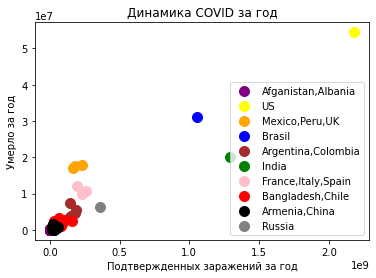

In [ ]:
plt.scatter(YeARCl['confirmed_year'], YeARCl['death_year'], s=100, c='purple', label='Afganistan,Albania')
plt.scatter(YeARCl2['confirmed_year'], YeARCl2['death_year'], s=100, c='yellow', label='US')
plt.scatter(YeARCl3['confirmed_year'], YeARCl3['death_year'], s=100, c='orange',label='Mexico,Peru,UK')
plt.scatter(YeARCl4['confirmed_year'], YeARCl4['death_year'], s=100, c='blue', label='Brasil')
plt.scatter(YeARCl5['confirmed_year'], YeARCl5['death_year'], s=100, c='brown', label='Argentina,Colombia')
plt.scatter(YeARCl6['confirmed_year'], YeARCl6['death_year'], s=100, c='green', label='India')
plt.scatter(YeARCl7['confirmed_year'], YeARCl7['death_year'], s=100, c='pink', label='France,Italy,Spain')
plt.scatter(YeARCl8['confirmed_year'], YeARCl8['death_year'], s=100, c='red', label='Bangladesh,Chile')
plt.scatter(YeARCl9['confirmed_year'], YeARCl9['death_year'], s=100, c='black', label='Armenia,China')
plt.scatter(YeARCl10['confirmed_year'], YeARCl10['death_year'], s=100, c='gray', label='Russia')
plt.xlabel('Подтвержденных заражений за год')
plt.ylabel('Умерло за год')
plt.title('Динамика COVID за год')
plt.legend()
plt.show()

**Итог:**

По графику видно, что подтвержденных заражений и смертности больше всего за год с 2020 по 2021 в США, для него выделен отдельный кластер. Далее идет Бразилия, затем Индия, для них тоже выделены отдельные кластеры. У России за этот же промежуток времени показатели заболеваемости и смертностни - относительно невысокие. Если брать суточные данные на 26.02.23(отдельный файл), то заболевших больше всего в Южной Корее, а смертности в Японии. 